In [114]:
# Session 21 - Project "Predicting_players_rating" by Sreedhara Jagatagar  Sreenivasa

#In this project we are going to predict the overall rating of soccer player based on their attributes such as 
# 'crossing', 'finishing etc.

#The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) 
#has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

#Download the data in the same folder and run the following commmand to get it in the environment


#About the Dataset 
#The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database 
#and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. 
#It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as 
#the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
#+25,000 matches 
#+10,000 players 
#11 European Countries with their lead championship 
#Seasons 2008 to 2016 
#Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates 
#Team line up with squad formation (X, Y coordinates) 
#Betting odds from up to 10 providers Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
#The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. 
#It is not just the stats that come with a new version of the game but also the weekly updates. 
#So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, 
#you would normally see the same in the dataset

#Import Libraries
import sqlite3 
import pandas as pd 
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading Dataset

DB file is available in the directory. Here We loading this dataset into pandas dataframe using the SQL

In [ ]:
#Read Data from the Database into pandas
# Create your connection. 
cnx = sqlite3.connect('database.sqlite') 
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [170]:
#Show First 5 records
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [117]:
#Check the total number of rows
df.id.count()

183978

Basic Details about Data

Check for datatypes and presence of null values

In [118]:
#Check all the atributes with row count before removing null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

Remove rows with null values.

In [119]:
#Remove rows with null values as they are less in count
df.dropna(axis=0, inplace=True)

In [120]:
#Check all the atributes with row count after removing null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

Basics statistics of numerical values

In [121]:
#Describe the data set to know each field mean, min and maximum value
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
mean,91995.89,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,...,57.87,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33
std,53092.66,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,...,15.15,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19
min,1.00,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,46074.25,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,92003.50,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,137935.75,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00
max,183978.00,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,97.00,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00


In [122]:
#Set the precisions
pd.set_option("display.precision", 2)

In [123]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Details of Categorical Columns

In [174]:
#Details of categorical variable preferred_foot
df.preferred_foot.value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

In [175]:
#Details of categorical variable attacking work rate
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [177]:
#Details of categorical variable defencsive work rate
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

Visual Analysis

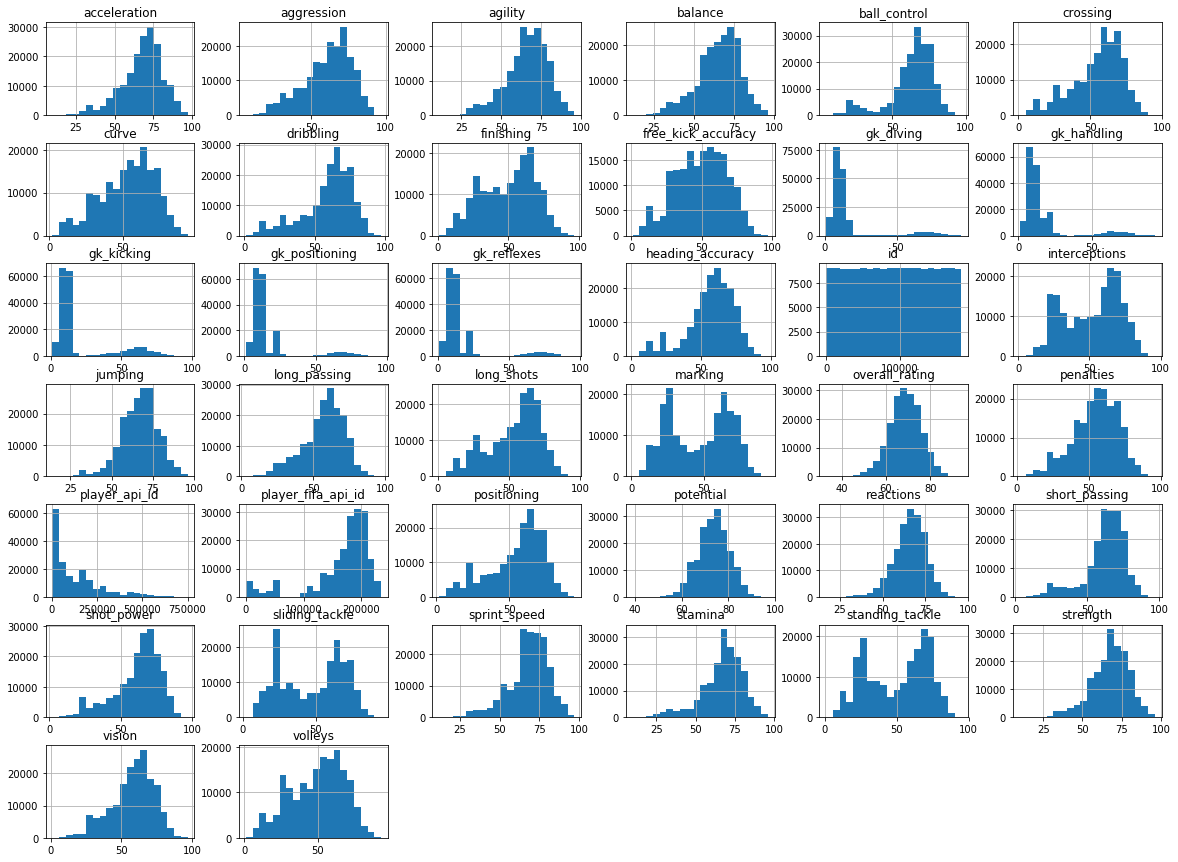

In [12]:
#Visual Analysis
df.hist(bins=20, figsize=(20,15))
plt.show()

In [180]:
#Visual Analysis cont..
#sns.pairplot(df.head(100))
#plt.show()

In [181]:
#Check Corelations among variables.
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.00e+00,3.74e-03,2.05e-03,-3.74e-03,8.37e-04,-0.02,-8.17e-03,-0.01,-6.70e-03,-6.92e-03,...,-7.93e-03,-1.18e-02,-1.03e-02,-1.25e-02,-1.11e-02,0.01,1.09e-02,8.76e-03,1.40e-02,1.47e-02
player_fifa_api_id,3.74e-03,1.00e+00,5.57e-01,-2.79e-01,-2.13e-02,-0.07,-2.98e-02,-0.10,-6.53e-02,-8.87e-02,...,-1.63e-01,-1.75e-01,-7.56e-02,-7.11e-02,-5.52e-02,-0.09,-1.39e-01,-2.48e-01,-1.41e-01,-1.32e-01
player_api_id,2.05e-03,5.57e-01,1.00e+00,-3.28e-01,1.06e-02,-0.11,-6.23e-02,-0.13,-9.02e-02,-1.31e-01,...,-1.88e-01,-1.62e-01,-8.98e-02,-8.67e-02,-7.36e-02,-0.07,-1.25e-01,-2.30e-01,-1.26e-01,-1.22e-01
overall_rating,-3.74e-03,-2.79e-01,-3.28e-01,1.00e+00,7.65e-01,0.36,3.30e-01,0.31,4.58e-01,3.62e-01,...,4.31e-01,3.93e-01,1.32e-01,1.64e-01,1.28e-01,0.03,6.72e-03,2.88e-02,8.03e-03,7.80e-03
potential,8.37e-04,-2.13e-02,1.06e-02,7.65e-01,1.00e+00,0.28,2.88e-01,0.21,3.83e-01,3.02e-01,...,3.79e-01,3.15e-01,5.41e-02,8.21e-02,6.33e-02,-0.01,5.86e-03,9.23e-02,4.47e-03,4.94e-03
crossing,-2.02e-02,-6.56e-02,-1.13e-01,3.57e-01,2.77e-01,1.00,5.77e-01,0.37,7.90e-01,6.38e-01,...,6.94e-01,5.74e-01,2.35e-01,2.85e-01,2.75e-01,-0.60,-5.96e-01,-3.57e-01,-5.98e-01,-6.02e-01
finishing,-8.17e-03,-2.98e-02,-6.23e-02,3.30e-01,2.88e-01,0.58,1.00e+00,0.37,5.80e-01,8.51e-01,...,6.52e-01,7.26e-01,-2.85e-01,-2.30e-01,-2.62e-01,-0.48,-4.65e-01,-2.92e-01,-4.71e-01,-4.73e-01
heading_accuracy,-1.18e-02,-1.04e-01,-1.30e-01,3.13e-01,2.06e-01,0.37,3.73e-01,1.00,5.48e-01,3.91e-01,...,3.36e-01,4.31e-01,4.61e-01,4.80e-01,4.41e-01,-0.67,-6.49e-01,-4.03e-01,-6.49e-01,-6.52e-01
short_passing,-6.70e-03,-6.53e-02,-9.02e-02,4.58e-01,3.83e-01,0.79,5.80e-01,0.55,1.00e+00,6.40e-01,...,7.66e-01,6.13e-01,3.50e-01,4.15e-01,3.80e-01,-0.69,-6.90e-01,-4.23e-01,-6.91e-01,-6.93e-01
volleys,-6.92e-03,-8.87e-02,-1.31e-01,3.62e-01,3.02e-01,0.64,8.51e-01,0.39,6.40e-01,1.00e+00,...,6.91e-01,7.13e-01,-1.70e-01,-1.08e-01,-1.28e-01,-0.51,-4.86e-01,-2.79e-01,-4.90e-01,-4.92e-01


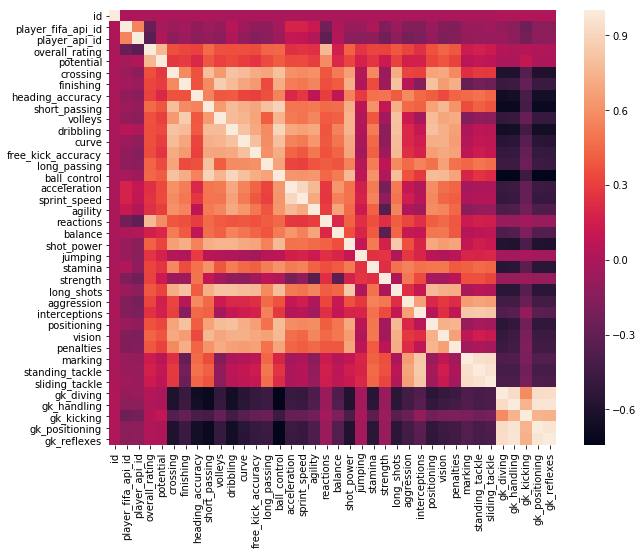

In [184]:
#Show the Coorelations in the picture
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

C:\Sreedhara\DataScientist\Install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


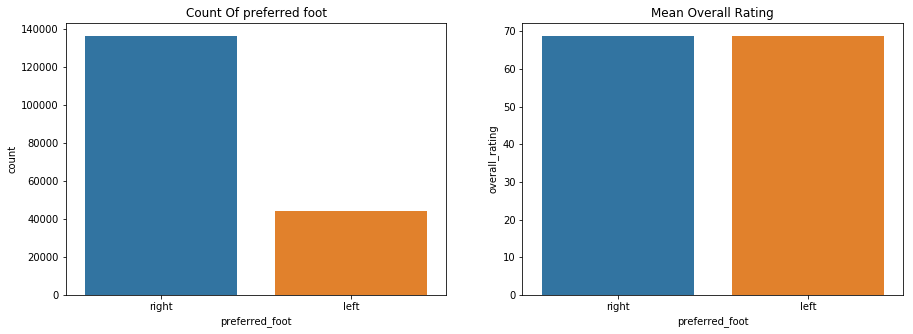

Here Mean overall rating is same and there is no impact on overall rating so we can ignore this variable


In [192]:
#Analyze the significane of left and Right Foot.
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.preferred_foot)
plt.title('Count Of preferred foot')

plt.subplot(1,2,2)
sns.barplot(x='preferred_foot', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean Overall Rating')
plt.show()
print('Here Mean overall rating is same and there is no impact on overall rating so we can ignore this variable')

C:\Sreedhara\DataScientist\Install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


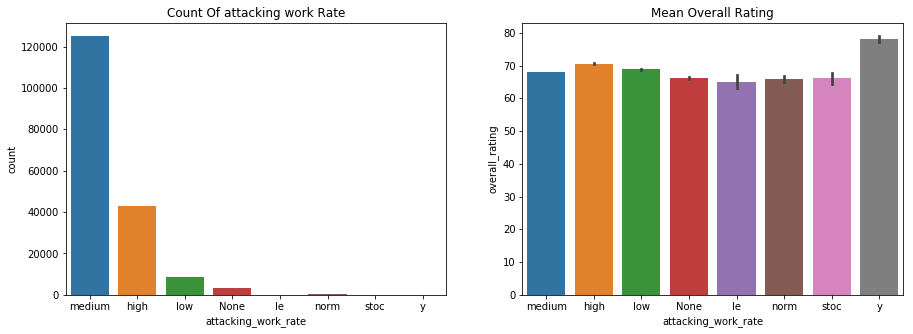

Here Mean overall rating is almost same for differt types of attacking and is between 68 to 75 so not much significance


In [195]:
#Analyze the significane of attacking work Rate.
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of attacking work Rate')

plt.subplot(1,2,2)
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean Overall Rating')
plt.show()
print('Here Mean overall rating is almost same for differt types of attacking and is between 68 to 75 so not much significance')

C:\Sreedhara\DataScientist\Install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


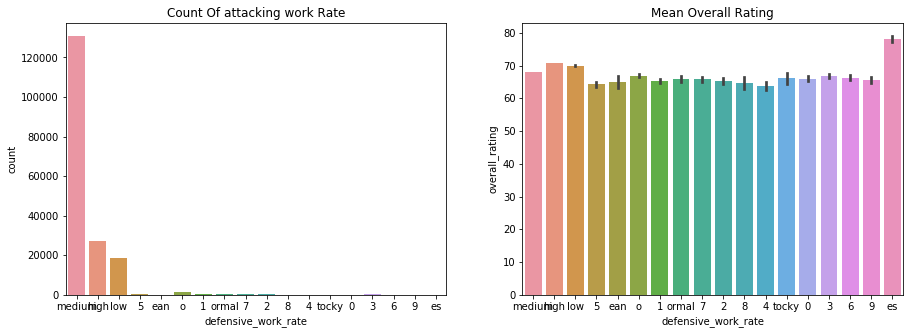

Here Mean overall rating is almost same for differt types of defensive and is between 68 to 75 so not much significance


In [196]:
#Analyze the significane of attacking work Rate.
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.defensive_work_rate)
plt.title('Count Of attacking work Rate')

plt.subplot(1,2,2)
sns.barplot(x='defensive_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean Overall Rating')
plt.show()
print('Here Mean overall rating is almost same for differt types of defensive and is between 68 to 75 so not much significance')

Above analysis shows that there is not much impact on overall rating from preferred_foot, attacking_work_rate and defensive_work_rate. So I am going ignore these variales for the Model.

And also we have ignored id, player_fifa_api_id, player_api_id, date as no significace on overall rating.

And OVERALL_RATING is target variales.

In [128]:
df.shape

(180354, 42)

Indipendant variables for the Model

In [202]:
#So Columns to be considered for Indipendant variables.
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

Target Variable for the Model

In [130]:
#Column to be considered for Target or dependant variable
target = ['overall_rating']

Create Data Frame for both Independant and Dependant Variables.

In [203]:
#Create X and Y dataframe
X=df[features]
Y=df[target]

In [204]:
X.shape

(180354, 34)

In [205]:
Y.shape

(180354, 1)

In [132]:
#Show X's frist row
X.iloc[0]

potential             71.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            71.0
interceptions         70.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       69.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 0, dtype: float64

In [133]:
#Show Y values
Y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


In [134]:
#Create a Model for all the data to evaluate
model = sm.OLS(Y, X).fit()

In [209]:
#Analyze stats for all the data
model.summary()
#print('R-squared shows the 99.80% so the model the perfect')
#print('P Values shows less than 0.05 for almost all the variables other than Balance and Vision variables. So this shows Variables are impacting on Overall Rating')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.198e+06
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:12:13   Log-Likelihood:            -4.4209e+05
No. Observations:              180354   AIC:                         8.842e+05
Df Residuals:                  180320   BIC:                         8.846e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
potential              0.3557      0.001    263.154      0.000       0.353       0.358
crossing               0.0221      0.001     26.238      0.000       0.020       0.024
finishing              0.0100      0.001     10.832      0.000       0.008       0.012
heading_accuracy       0.0667      0.001     81.261      0.000       0.065       0.068
short_passing          0.0460      0.001     33.197      0.000       0.043       0.049
volleys                0.0048      0.001      5.771      0.000       0.003       0.006
dribbling             -0.0127      0.001    -10.801      0.000      -0.015      -0.010
curve                  0.0112      0.001     13.877      0.000       0.010       0.013
free_kick_accuracy     0.0109      0.001     15.233      0.000       0.009       0.012
long_passing           0.0080      0.001      8.369      0.000       0.006       0.010
ball_control           0.1359      0.002     84.966      0.000       0.133       0.139
acceleration           0.0059      0.001      4.240      0.000       0.003       0.009
sprint_speed           0.0071      0.001      5.351      0.000       0.004       0.010
agility               -0.0150      0.001    -14.819      0.000      -0.017      -0.013
reactions              0.2149      0.001    197.780      0.000       0.213       0.217
balance                0.0009      0.001      1.229      0.219      -0.001       0.002
shot_power             0.0172      0.001     19.413      0.000       0.015       0.019
jumping                0.0146      0.001     19.848      0.000       0.013       0.016
stamina               -0.0060      0.001     -7.350      0.000      -0.008      -0.004
strength               0.0504      0.001     63.409      0.000       0.049       0.052
long_shots            -0.0116      0.001    -12.548      0.000      -0.013      -0.010
aggression             0.0208      0.001     30.087      0.000       0.019       0.022
interceptions          0.0142      0.001     19.106      0.000       0.013       0.016
positioning           -0.0081      0.001    -10.202      0.000      -0.010      -0.007
vision                -0.0012      0.001     -1.326      0.185      -0.003       0.001
penalties              0.0137      0.001     18.085      0.000       0.012       0.015
marking                0.0307      0.001     27.118      0.000       0.028       0.033
standing_tackle        0.0037      0.001      2.789      0.005       0.001       0.006
sliding_tackle        -0.0297      0.001    -26.719      0.000      -0.032      -0.028
gk_diving              0.1624      0.001    110.000      0.000       0.160       0.165
gk_handling            0.0292      0.002     15.130      0.000       0.025       0.033
gk_kicking            -0.0314      0.001    -50.077      0.000      -0.033      -0.030
gk_positioning         0.0511      0.0

In [211]:
print('Above R-squared shows the 99.80% so the model the perfect')
print(' ')
print('Above P Values shows less than 0.05 for almost all the variables other than Balance and Vision variables. So this shows Variables are impacting on Overall Rating')

Above R-squared shows the 99.80% so the model the perfect
 
Above P Values shows less than 0.05 for almost all the variables other than Balance and Vision variables. So this shows Variables are impacting on Overall Rating


Train and Test Split

We will be using 67:33 split for train and test datasets

In [250]:
#Split the Dataset into Training and Test Datasets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [251]:
#Print the number of rows and columns
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120837, 34)
(120837, 1)
(59517, 34)
(59517, 1)


Fitting Regression Model

Using StatsModel

In [254]:
#Add constant to each set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

#Create a Model for Trainign Set
model_sm = sm.OLS(Y_train, X_train).fit()

In [255]:
X_train.head()

,const,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
153356,1.0,83.0,25.0,25.0,25.0,27.0,25.0,25.0,25.0,25.0,...,25.0,24.0,25.0,25.0,25.0,80.0,76.0,75.0,77.0,79.0
159040,1.0,77.0,16.0,10.0,73.0,41.0,59.0,41.0,25.0,18.0,...,37.0,41.0,75.0,74.0,78.0,15.0,12.0,14.0,15.0,12.0
122440,1.0,69.0,13.0,12.0,12.0,26.0,16.0,19.0,13.0,15.0,...,31.0,32.0,15.0,16.0,12.0,61.0,53.0,56.0,58.0,63.0
164582,1.0,78.0,68.0,57.0,67.0,77.0,44.0,77.0,68.0,63.0,...,74.0,55.0,72.0,74.0,69.0,10.0,12.0,7.0,10.0,8.0
112833,1.0,77.0,31.0,65.0,51.0,51.0,44.0,54.0,46.0,47.0,...,35.0,64.0,46.0,58.0,47.0,7.0,24.0,46.0,24.0,24.0


In [256]:
X_test.head()

,const,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
35543,1.0,74.0,20.0,20.0,20.0,22.0,7.0,20.0,10.0,9.0,...,26.0,69.0,20.0,20.0,9.0,64.0,63.0,58.0,62.0,74.0
28735,1.0,85.0,52.0,23.0,85.0,71.0,54.0,64.0,36.0,22.0,...,49.0,52.0,85.0,88.0,85.0,10.0,15.0,16.0,15.0,15.0
168029,1.0,75.0,64.0,49.0,53.0,66.0,37.0,67.0,61.0,41.0,...,65.0,51.0,51.0,54.0,46.0,9.0,14.0,9.0,12.0,12.0
138117,1.0,86.0,67.0,71.0,76.0,72.0,68.0,84.0,72.0,57.0,...,71.0,58.0,13.0,18.0,14.0,10.0,8.0,13.0,8.0,10.0
123316,1.0,76.0,31.0,23.0,71.0,61.0,29.0,44.0,31.0,24.0,...,43.0,47.0,69.0,69.0,66.0,15.0,6.0,7.0,13.0,10.0


In [257]:
#Model R Rquared for  Sample Train Data and it shows 84%
model_sm.rsquared

0.8418974549985564

In [258]:
#Overall stats summary of sample train data and it shows the model is perfect
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.892e+04
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:44:32   Log-Likelihood:            -2.9552e+05
No. Observations:              120837   AIC:                         5.911e+05
Df Residuals:                  120802   BIC:                         5.915e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.4404      0.115    -29.944      0.000      -3.666      -3.215
potential              0.3767      0.002    210.574      0.000       0.373       0.380
crossing               0.0217      0.001     21.165      0.000       0.020       0.024
finishing              0.0113      0.001     10.040      0.000       0.009       0.014
heading_accuracy       0.0694      0.001     69.352      0.000       0.067       0.071
short_passing          0.0512      0.002     30.286      0.000       0.048       0.054
volleys                0.0048      0.001      4.793      0.000       0.003       0.007
dribbling             -0.0135      0.001     -9.450      0.000      -0.016      -0.011
curve                  0.0111      0.001     11.384      0.000       0.009       0.013
free_kick_accuracy     0.0129      0.001     14.887      0.000       0.011       0.015
long_passing           0.0059      0.001      5.150      0.000       0.004       0.008
ball_control           0.1335      0.002     68.788      0.000       0.130       0.137
acceleration           0.0062      0.002      3.671      0.000       0.003       0.010
sprint_speed           0.0092      0.002      5.760      0.000       0.006       0.012
agility               -0.0075      0.001     -6.061      0.000      -0.010      -0.005
reactions              0.2109      0.001    158.683      0.000       0.208       0.214
balance                0.0082      0.001      8.593      0.000       0.006       0.010
shot_power             0.0173      0.001     16.061      0.000       0.015       0.019
jumping                0.0148      0.001     16.558      0.000       0.013       0.017
stamina               -0.0061      0.001     -6.165      0.000      -0.008      -0.004
strength               0.0611      0.001     59.546      0.000       0.059       0.063
long_shots            -0.0136      0.001    -12.165      0.000      -0.016      -0.011
aggression             0.0211      0.001     25.015      0.000       0.019       0.023
interceptions          0.0114      0.001     12.642      0.000       0.010       0.013
positioning           -0.0100      0.001    -10.327      0.000      -0.012      -0.008
vision                -0.0012      0.001     -1.166      0.244      -0.003       0.001
penalties              0.0138      0.001     15.067      0.000       0.012       0.016
marking                0.0332      0.001     24.150      0.000       0.030       0.036
standing_tackle        0.0037      0.002      2.299      0.022       0.001       0.007
sliding_tackle        -0.0284      0.001    -21.018      0.000      -0.031      -0.026
gk_diving              0.1614      0.002     90.106      0.000       0.158       0.165
gk_handling            0.0327      0.002     13.889      0.000       0.028       0.037
gk_kicking            -0.0335      0.0

In [259]:
#Create Linear Regression Object
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [260]:
#Declare DF and display coefficient
df_coef=pd.DataFrame({'Colum_name':X_train.columns,'Coefcient':model_reg.coef_[0]})
df_coef

,Colum_name,Coefcient
0,const,2.86e-18
1,potential,3.77e-01
2,crossing,2.17e-02
3,finishing,1.13e-02
4,heading_accuracy,6.94e-02
5,short_passing,5.12e-02
6,volleys,4.84e-03
7,dribbling,-1.35e-02
8,curve,1.11e-02
9,free_kick_accuracy,1.29e-02


In [261]:
#Validate the intercept
model_reg.intercept_

array([-3.44040153])

Evaluate Model Performance

In [262]:
#Evaluate the Model.
#Show the Model score. IT shows 84%. This is the best score.
print('Model Score - Train:',model_reg.score(X_train,Y_train))
print('Model Score - Test:',model_reg.score(X_test,Y_test))
print(' ')
print('Above Model Score show there is not muchh difference in Test and Train. So it fitted perfectly')

Model Score - Train: 0.8418974549985563
Model Score - Test: 0.8412690897596597
 
Above Model Score show there is not muchh difference in Test and Train. So it fitted perfectly


In [295]:
#Evaluate the Model Cont..
#Predict and attach to the data set for Train Data set
y_prediction_train=model_reg.predict(X_train)
print('Overall rating Prediction using Train Data Set')
print(' ')
print('Overall Rating - Train Mean :',y_prediction_train.mean())
y_prediction_train

Overall rating Prediction using Train Data Set
 
Overall Rating - Train Mean : 68.63507038407111


array([[77.76359406],
       [69.25837732],
       [60.99945768],
       ...,
       [78.17474829],
       [70.34611878],
       [75.98125712]])

In [298]:
#Evaluate the Model Cont..
#Predict and attach to the data set for Test Data set
y_prediction_test = model_reg.predict(X_test)
print('Overall rating Prediction using Test Data Set')
print(' ')
print('Overall Rating - Test Mean :',y_prediction_test.mean())
y_prediction_test

Overall rating Prediction using Test Data Set
 
Overall Rating - Test Mean : 68.63876173725984


array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

In [268]:
#Evaluate the Model cont.. 
#Perform Prediction for RMSE 

print('RMSE Train', sqrt(mean_squared_error(y_prediction_train, Y_train)))
print('RMSE Test' ,sqrt(mean_squared_error(y_prediction_test, Y_test)))
print(' ')
print('Above RMSE data show there is not muchh difference in Test and Train. So it fitted perfectly')

RMSE Train 2.7918436260264046
RMSE Test 2.805303046855208
 
Above RMSE data show there is not muchh difference in Test and Train. So it fitted perfectly


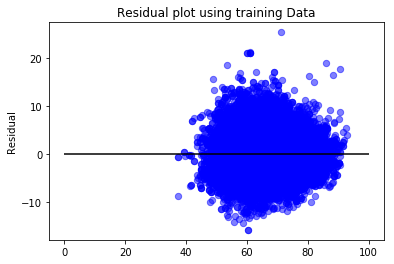

Above plot shows it is good model as residual are randomly scattered around line zero


In [274]:
#Evaluate the Model cont.. 

#Plot using Train  Data with caluclated Residual
#plt.scatter(model_reg.predict(X_train),model_reg.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(y_prediction_train,(y_prediction_train-Y_train),c='b',s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using training Data')
plt.ylabel('Residual')
plt.show()
print('Above plot shows it is good model as residual are randomly scattered around line zero')

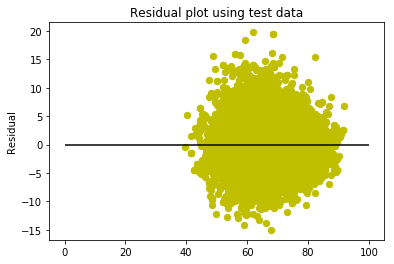

Above plot shows it is good model as residual are randomly scattered around line zero


In [275]:
#Evaluate the Model cont.. 
#Plot using Test Data with caluclated Residual
plt.scatter(y_prediction_test,(y_prediction_test-Y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using test data')
plt.ylabel('Residual')
plt.show()
print('Above plot shows it is good model as residual are randomly scattered around line zero')

Cross Validation Scores

In [288]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Perform 10-fold cross validation
scores = cross_val_score(model_reg, X, Y, cv=10, scoring='neg_mean_squared_error')

print('Cross-validated scores:', scores)
print(' ')
print('Standard Deviation :', scores.std())
print('Standard Mean :', scores.mean())

Cross-validated scores: [-7.93511758 -7.72122749 -7.70948306 -7.82193493 -7.66450703 -8.23194336
 -7.65735506 -7.90798152 -8.00471306 -7.85207381]
 
Standard Deviation : 0.1700172762538327
Standard Mean : -7.850633690971664


Tuning Model Performance

Try to use below two tuning options separately and check if model performance improves

** VIF To check for multi-collinearity**

In [291]:
#Tuning Model Performance
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF Factor' ,ascending=False)

,VIF Factor,features
10,249.25,ball_control
0,227.50,potential
11,211.03,acceleration
12,190.81,sprint_speed
4,180.54,short_passing
6,120.71,dribbling
14,120.48,reactions
27,117.98,standing_tackle
13,105.57,agility
28,78.38,sliding_tackle


In [292]:
print('With Above some of variables can be removed based on VIF factor and rebuild the model if required')

With Above some of variables can be removed based on VIF factor and rebuild the model if required
